In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime

In [2]:
# read in the dataset
df = pd.read_csv('Habit_data.csv')
#pd.set_option('display.max_columns', None)
df.head()

,Timestamp,Gender,Age,Country,State or Province,Do you have a habit you would like to cultivate or break,State the habit(s) you would like to cultivate,What Category does the habit fall into,Have you used a habit or productivity app,What features did you like most about the app,What features did you not like about the app,"If no, would you be interested in an app that enhances productivity or habit formation",Are you willing to be accountable to a community of people trying to break or cultivate habits,Would you like to have an accountability partner or mentor,Would you like to be rewarded for achieving your desired goal,"If Yes, how would you like to be rewarded",Any other comment,State the habit(s) you would like to break,Occupation,What time do you start your day,What time do you shut down activities for the day
0,2/12/2023 21:30:29,Female,25-34,Zimbabwe,Manicaland,Yes,Exercise regularly,Lifestyle,No,N/a,N/a,Yes,Yes,Yes,Yes,Data entry job and money,NaN,Not planning to do list,Data Analyst,9:00:00 AM,11:00:00 PM
1,2/12/2023 21:34:33,Female,25-34,Nigeria,Lagos,Yes,"Patience, tolerance, eating healthy and exerci...",Health,No,NaN,NaN,Yes,Yes,Yes,Yes,Any way possible,Thanks,"Anger, bitterness, hot tempere and pouring out...",Business,6:00:00 AM,10:00:00 PM
2,2/12/2023 22:11:23,Female,25-34,Nigeria,Kwara,Yes,Writing articles,Academics,No,NaN,NaN,Yes,Yes,Yes,Yes,A little well-done will be fine,NaN,Procrastination,Teacher,5:00:00 AM,9:00:00 AM
3,2/12/2023 22:11:25,Female,25-34,United States of America,Michigan,Yes,Regular exercise,Health,No,NaN,NaN,No,No,No,Yes,My reward lies in the benefits of the habits,NaN,Poor sleep quality,Student,6:30:00 AM,12:00:00 AM
4,2/12/2023 22:37:52,Female,55-64,Nigeria,Ogun State,Yes,Waking up on time immediately alarm rings,Lifestyle,No,NaN,NaN,Yes,No,No,Yes,With nice comments,None,Delay in getting up after alarm rang,Civil servant,4:00:00 AM,11:00:00 PM


In [3]:
# number of rows and column
df.shape

(106, 21)

In [4]:
# column names
df.columns

Index(['Timestamp', 'Gender', 'Age', 'Country', 'State or Province',
       'Do you have a habit you would like to cultivate or break',
       'State the habit(s) you would like to cultivate',
       'What Category does the habit fall into',
       'Have you used a habit or productivity app ',
       'What features did you like most about the app',
       'What features did you not like about the app',
       'If no, would you be interested in an app that enhances productivity or habit formation',
       'Are you willing to be accountable to a community of people trying to break or cultivate habits',
       'Would you like to have an accountability partner or mentor',
       'Would you like to be rewarded for achieving your desired goal',
       'If Yes, how would you like to be rewarded', 'Any other comment',
       'State the habit(s) you would like to break', 'Occupation',
       'What time do you start your day',
       'What time do you shut down activities for the day'],
      dt

In [5]:
# rename the columns

df.rename(
    columns=({ 'Do you have a habit you would like to cultivate or break': 'Intent_on_habit',
              'State the habit(s) you would like to cultivate': 'Positive_habits',
             'State the habit(s) you would like to break' : 'Negative_habits',
             'What Category does the habit fall into':'Category',
             'Have you used a habit or productivity app ':'Used_habit_app',
             'What features did you like most about the app':'Features_liked',
             'What features did you not like about the app':'Features_not_liked',
             'If no, would you be interested in an app that enhances productivity or habit formation':'habit_app_interest',
             'Are you willing to be accountable to a community of people trying to break or cultivate habits':'Join_a_community',
             'Would you like to have an accountability partner or mentor':'Find_a_partner/mentor',
             'Would you like to be rewarded for achieving your desired goal':'Get_reward',
             'If Yes, how would you like to be rewarded':'Reward_type',
             'What time do you start your day':'Start_day',
             'What time do you shut down activities for the day':'End_day'}), 
    inplace=True,
)

df.head()

,Timestamp,Gender,Age,Country,State or Province,Intent_on_habit,Positive_habits,Category,Used_habit_app,Features_liked,Features_not_liked,habit_app_interest,Join_a_community,Find_a_partner/mentor,Get_reward,Reward_type,Any other comment,Negative_habits,Occupation,Start_day,End_day
0,2/12/2023 21:30:29,Female,25-34,Zimbabwe,Manicaland,Yes,Exercise regularly,Lifestyle,No,N/a,N/a,Yes,Yes,Yes,Yes,Data entry job and money,NaN,Not planning to do list,Data Analyst,9:00:00 AM,11:00:00 PM
1,2/12/2023 21:34:33,Female,25-34,Nigeria,Lagos,Yes,"Patience, tolerance, eating healthy and exerci...",Health,No,NaN,NaN,Yes,Yes,Yes,Yes,Any way possible,Thanks,"Anger, bitterness, hot tempere and pouring out...",Business,6:00:00 AM,10:00:00 PM
2,2/12/2023 22:11:23,Female,25-34,Nigeria,Kwara,Yes,Writing articles,Academics,No,NaN,NaN,Yes,Yes,Yes,Yes,A little well-done will be fine,NaN,Procrastination,Teacher,5:00:00 AM,9:00:00 AM
3,2/12/2023 22:11:25,Female,25-34,United States of America,Michigan,Yes,Regular exercise,Health,No,NaN,NaN,No,No,No,Yes,My reward lies in the benefits of the habits,NaN,Poor sleep quality,Student,6:30:00 AM,12:00:00 AM
4,2/12/2023 22:37:52,Female,55-64,Nigeria,Ogun State,Yes,Waking up on time immediately alarm rings,Lifestyle,No,NaN,NaN,Yes,No,No,Yes,With nice comments,None,Delay in getting up after alarm rang,Civil servant,4:00:00 AM,11:00:00 PM


In [6]:
# check for missing values
df.isnull().sum()

Timestamp                 0
Gender                    0
Age                       0
Country                   0
State or Province         0
Intent_on_habit           0
Positive_habits           1
Category                  0
Used_habit_app            0
Features_liked           72
Features_not_liked       74
habit_app_interest        0
Join_a_community          0
Find_a_partner/mentor     0
Get_reward                0
Reward_type              39
Any other comment        61
Negative_habits           2
Occupation                0
Start_day                 0
End_day                   0
dtype: int64

In [7]:
# get percentage of missing values
null_percentage = df.isnull().sum().sort_values(ascending = False)/df.shape[0]*100
null_percentage

Features_not_liked       69.811321
Features_liked           67.924528
Any other comment        57.547170
Reward_type              36.792453
Negative_habits           1.886792
Positive_habits           0.943396
Category                  0.000000
Gender                    0.000000
Age                       0.000000
Country                   0.000000
State or Province         0.000000
Intent_on_habit           0.000000
End_day                   0.000000
Used_habit_app            0.000000
Start_day                 0.000000
habit_app_interest        0.000000
Join_a_community          0.000000
Find_a_partner/mentor     0.000000
Get_reward                0.000000
Occupation                0.000000
Timestamp                 0.000000
dtype: float64

In [8]:
df['Used_habit_app'].value_counts()

No     90
Yes    16
Name: Used_habit_app, dtype: int64

In [9]:
# check for duplicates
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
Timestamp                106 non-null object
Gender                   106 non-null object
Age                      106 non-null object
Country                  106 non-null object
State or Province        106 non-null object
Intent_on_habit          106 non-null object
Positive_habits          105 non-null object
Category                 106 non-null object
Used_habit_app           106 non-null object
Features_liked           34 non-null object
Features_not_liked       32 non-null object
habit_app_interest       106 non-null object
Join_a_community         106 non-null object
Find_a_partner/mentor    106 non-null object
Get_reward               106 non-null object
Reward_type              67 non-null object
Any other comment        45 non-null object
Negative_habits          104 non-null object
Occupation               106 non-null object
Start_day                106 non-null object

<b>Data Cleaning and Preprocessing<b/>

In [11]:
#drop columns
df.drop(columns = ['Features_liked','Features_not_liked','Any other comment'], inplace = True)
df.head()

,Timestamp,Gender,Age,Country,State or Province,Intent_on_habit,Positive_habits,Category,Used_habit_app,habit_app_interest,Join_a_community,Find_a_partner/mentor,Get_reward,Reward_type,Negative_habits,Occupation,Start_day,End_day
0,2/12/2023 21:30:29,Female,25-34,Zimbabwe,Manicaland,Yes,Exercise regularly,Lifestyle,No,Yes,Yes,Yes,Yes,Data entry job and money,Not planning to do list,Data Analyst,9:00:00 AM,11:00:00 PM
1,2/12/2023 21:34:33,Female,25-34,Nigeria,Lagos,Yes,"Patience, tolerance, eating healthy and exerci...",Health,No,Yes,Yes,Yes,Yes,Any way possible,"Anger, bitterness, hot tempere and pouring out...",Business,6:00:00 AM,10:00:00 PM
2,2/12/2023 22:11:23,Female,25-34,Nigeria,Kwara,Yes,Writing articles,Academics,No,Yes,Yes,Yes,Yes,A little well-done will be fine,Procrastination,Teacher,5:00:00 AM,9:00:00 AM
3,2/12/2023 22:11:25,Female,25-34,United States of America,Michigan,Yes,Regular exercise,Health,No,No,No,No,Yes,My reward lies in the benefits of the habits,Poor sleep quality,Student,6:30:00 AM,12:00:00 AM
4,2/12/2023 22:37:52,Female,55-64,Nigeria,Ogun State,Yes,Waking up on time immediately alarm rings,Lifestyle,No,Yes,No,No,Yes,With nice comments,Delay in getting up after alarm rang,Civil servant,4:00:00 AM,11:00:00 PM


In [12]:
df.isnull().sum()

Timestamp                 0
Gender                    0
Age                       0
Country                   0
State or Province         0
Intent_on_habit           0
Positive_habits           1
Category                  0
Used_habit_app            0
habit_app_interest        0
Join_a_community          0
Find_a_partner/mentor     0
Get_reward                0
Reward_type              39
Negative_habits           2
Occupation                0
Start_day                 0
End_day                   0
dtype: int64

In [13]:
# drop missing values in positive_habit and negative_habit column
df.dropna(subset = ['Positive_habits','Negative_habits'], inplace=True)
df.isnull().sum()

Timestamp                 0
Gender                    0
Age                       0
Country                   0
State or Province         0
Intent_on_habit           0
Positive_habits           0
Category                  0
Used_habit_app            0
habit_app_interest        0
Join_a_community          0
Find_a_partner/mentor     0
Get_reward                0
Reward_type              38
Negative_habits           0
Occupation                0
Start_day                 0
End_day                   0
dtype: int64

In [14]:
# fill missing values in reward type columns

df = df.fillna(method= 'bfill', axis = 1)
df.isna().sum()

Timestamp                0
Gender                   0
Age                      0
Country                  0
State or Province        0
Intent_on_habit          0
Positive_habits          0
Category                 0
Used_habit_app           0
habit_app_interest       0
Join_a_community         0
Find_a_partner/mentor    0
Get_reward               0
Reward_type              0
Negative_habits          0
Occupation               0
Start_day                0
End_day                  0
dtype: int64

In [15]:
# split the 'positive_habits' column
positive = df['Positive_habits'].str.split(',|\n|&', expand = True)

#rename the columns
positive.columns = ['positive_habits','others','others','others','others']

#drop other columns
positive.drop(columns = ['others','others','others','others'], inplace = True)

positive.head()

,positive_habits
0,Exercise regularly
1,Patience
2,Writing articles
3,Regular exercise
4,Waking up on time immediately alarm rings


In [16]:
# check for values inn'Negative habits' column
df['Negative_habits'].value_counts()

Procrastination                                                        13
Procrastination                                                         5
Procastination                                                          2
Sleeping                                                                2
Procrastinating                                                         2
procrastination                                                         2
None                                                                    2
Sleeping late                                                           2
Laziness                                                                2
Procastinating                                                          2
Social media addiction                                                  1
Lateness and laziness                                                   1
Can't tell                                                              1
Absorbing things instead of saying the

In [16]:
# split the 'negative_habits' column
negative = df['Negative_habits'].str.split(',|\n|and', expand = True)

#rename the columns
negative.columns = ['negative_habits','others','others','others','others']

#drop other columns
negative.drop(columns = ['others','others'], inplace = True)

negative.head()

,negative_habits
0,Not planning to do list
1,Anger
2,Procrastination
3,Poor sleep quality
4,Delay in getting up after alarm rang


In [17]:
# concatenate the habit columns
habits = pd.concat([positive,negative], axis = 1)
habits.head()

,positive_habits,negative_habits
0,Exercise regularly,Not planning to do list
1,Patience,Anger
2,Writing articles,Procrastination
3,Regular exercise,Poor sleep quality
4,Waking up on time immediately alarm rings,Delay in getting up after alarm rang


In [18]:
df = pd.concat([df,habits], axis=1)

df.drop(columns = ['Positive_habits','Negative_habits'], inplace=True)

df.head()

,Timestamp,Gender,Age,Country,State or Province,Intent_on_habit,Category,Used_habit_app,habit_app_interest,Join_a_community,Find_a_partner/mentor,Get_reward,Reward_type,Occupation,Start_day,End_day,positive_habits,negative_habits
0,2/12/2023 21:30:29,Female,25-34,Zimbabwe,Manicaland,Yes,Lifestyle,No,Yes,Yes,Yes,Yes,Data entry job and money,Data Analyst,9:00:00 AM,11:00:00 PM,Exercise regularly,Not planning to do list
1,2/12/2023 21:34:33,Female,25-34,Nigeria,Lagos,Yes,Health,No,Yes,Yes,Yes,Yes,Any way possible,Business,6:00:00 AM,10:00:00 PM,Patience,Anger
2,2/12/2023 22:11:23,Female,25-34,Nigeria,Kwara,Yes,Academics,No,Yes,Yes,Yes,Yes,A little well-done will be fine,Teacher,5:00:00 AM,9:00:00 AM,Writing articles,Procrastination
3,2/12/2023 22:11:25,Female,25-34,United States of America,Michigan,Yes,Health,No,No,No,No,Yes,My reward lies in the benefits of the habits,Student,6:30:00 AM,12:00:00 AM,Regular exercise,Poor sleep quality
4,2/12/2023 22:37:52,Female,55-64,Nigeria,Ogun State,Yes,Lifestyle,No,Yes,No,No,Yes,With nice comments,Civil servant,4:00:00 AM,11:00:00 PM,Waking up on time immediately alarm rings,Delay in getting up after alarm rang


In [19]:
#convert start day column to datetime
df['Start_day'] = pd.to_datetime(df['Start_day']).dt.time

df['Start_day'].head()

0    09:00:00
1    06:00:00
2    05:00:00
3    06:30:00
4    04:00:00
Name: Start_day, dtype: object

In [20]:
#check the data type
df['Start_day'].dtypes

#change type to datetime
df['Start_day'] = pd.to_datetime(df['Start_day'], format = '%H:%M:%S').dt.time

#check the data type again
df['Start_day'].dtypes

dtype('O')

In [21]:
df['Start_day'].value_counts()

06:00:00    25
05:00:00    19
08:00:00    12
07:00:00    12
05:30:00     7
09:00:00     5
06:30:00     5
04:30:00     4
04:00:00     4
10:00:00     2
03:00:00     2
08:30:00     1
05:11:00     1
04:45:00     1
07:45:00     1
00:06:00     1
17:00:00     1
05:50:00     1
Name: Start_day, dtype: int64

In [22]:
#convert end day column to datetime
df['End_day'] = pd.to_datetime(df['End_day']).dt.time

df['End_day'].head()

0    23:00:00
1    22:00:00
2    09:00:00
3    00:00:00
4    23:00:00
Name: End_day, dtype: object

In [23]:
#check the data type
df['End_day'].dtypes

#change type from object to datetime
df['End_day'] = pd.to_datetime(df['End_day'], format = '%H:%M:%S').dt.time

#check the data type again
df['End_day'].dtypes

dtype('O')

In [24]:
df['End_day'].value_counts()

23:00:00    18
00:00:00    16
22:00:00    11
11:00:00     9
12:00:00     7
21:00:00     6
18:00:00     6
10:00:00     5
22:30:00     5
01:00:00     4
20:00:00     3
17:00:00     3
01:30:00     2
19:30:00     2
19:00:00     1
23:30:00     1
16:30:00     1
14:00:00     1
09:00:00     1
08:30:00     1
10:30:00     1
Name: End_day, dtype: int64

In [25]:
df['positive_habits'].value_counts()

Reading                                                    5
Reading                                                    3
Regular exercise                                           2
Reading more                                               2
Discipline                                                 2
Exercise                                                   1
Finishing my daily tasks                                   1
To create time to relax and sleep more                     1
Proper time management                                     1
Constantly excercising                                     1
Time management                                            1
Eating breakfast                                           1
Midnight prayer                                            1
Reading more and exercise                                  1
Punctuality                                                1
Healthy                                                    1
Having productive mornin

In [26]:
df['negative_habits'].value_counts()

Procrastination                                     13
Procrastination                                      6
procrastination                                      2
Procastinating                                       2
Laziness                                             2
Laziness                                             2
Sleeping late                                        2
None                                                 2
Procrastinating                                      2
Procrastinating                                      2
Sleeping                                             2
Procastination                                       2
Alcoholism                                           1
Sleeping early                                       1
Being broke😏                                         1
Time spent on Social Media                           1
Complete my to do list daily                         1
Not planning to do list                              1
Lie       

### Visualisations

In [27]:
# display the data set
df.head()

,Timestamp,Gender,Age,Country,State or Province,Intent_on_habit,Category,Used_habit_app,habit_app_interest,Join_a_community,Find_a_partner/mentor,Get_reward,Reward_type,Occupation,Start_day,End_day,positive_habits,negative_habits
0,2/12/2023 21:30:29,Female,25-34,Zimbabwe,Manicaland,Yes,Lifestyle,No,Yes,Yes,Yes,Yes,Data entry job and money,Data Analyst,09:00:00,23:00:00,Exercise regularly,Not planning to do list
1,2/12/2023 21:34:33,Female,25-34,Nigeria,Lagos,Yes,Health,No,Yes,Yes,Yes,Yes,Any way possible,Business,06:00:00,22:00:00,Patience,Anger
2,2/12/2023 22:11:23,Female,25-34,Nigeria,Kwara,Yes,Academics,No,Yes,Yes,Yes,Yes,A little well-done will be fine,Teacher,05:00:00,09:00:00,Writing articles,Procrastination
3,2/12/2023 22:11:25,Female,25-34,United States of America,Michigan,Yes,Health,No,No,No,No,Yes,My reward lies in the benefits of the habits,Student,06:30:00,00:00:00,Regular exercise,Poor sleep quality
4,2/12/2023 22:37:52,Female,55-64,Nigeria,Ogun State,Yes,Lifestyle,No,Yes,No,No,Yes,With nice comments,Civil servant,04:00:00,23:00:00,Waking up on time immediately alarm rings,Delay in getting up after alarm rang


In [28]:
 df['Age'].value_counts()

25-34       66
18-24       23
35-44        9
45-54        3
55-64        2
Under 18     1
Name: Age, dtype: int64

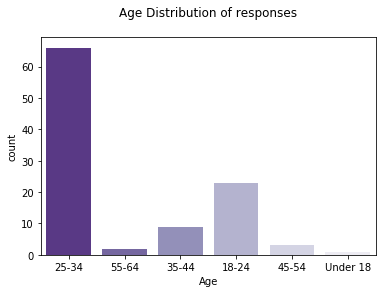

In [29]:
# bar chart visualising Age range counts
sns.countplot(x='Age', data=df, palette = 'Purples_r' )

plt.title('Age Distribution of responses\n');
plt.savefig('Age Distribution of responses.jpg')

In [30]:
# subset of gender within the age range of 25-34
Gender_Age = df[df['Age'] == '25-34']['Gender']

#set as a dataframe
Gender_Age = pd.DataFrame(Gender_Age, columns = ['Gender'])

Gender_Age.head()

,Gender
0,Female
1,Female
2,Female
3,Female
5,Female


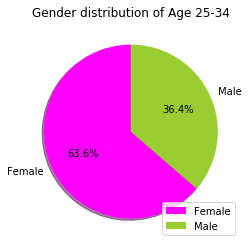

In [31]:
# pie chart to visualise the percentage of male and female within Age 25-34

plt.pie(Gender_Age['Gender'].value_counts(),
        labels = Gender_Age['Gender'].value_counts().index, 
        colors= ['magenta','yellowgreen'],
        startangle = 90, shadow = True, autopct = '%1.1f%%')

plt.title('Gender distribution of Age 25-34')
plt.legend(loc = 'lower right');
plt.savefig('Gender distribution of Age 25-34.jpg')

In [32]:
# distribution of habit category
df['Category'].value_counts()

Lifestyle    59
Health       16
Academics    14
Career       10
Finance       5
Name: Category, dtype: int64

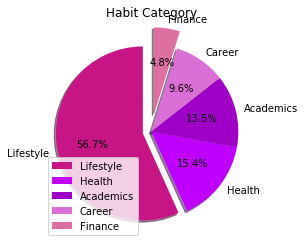

In [33]:
# pie chart showing percentage distribution of categories
plt.pie(df['Category'].value_counts(), 
        labels=df['Category'].value_counts().index,
        colors=['#C71585','#BF00FF','#9F00C5','#DA70D6','#DE6FA1'], startangle=90, 
        shadow= True ,autopct = '%1.1f%%', explode = [0.1,0,0,0,0.2]
        
       )
plt.title('Habit Category')
plt.legend(loc = 'lower left');
#plt.savefig('Habit Category.jpg')

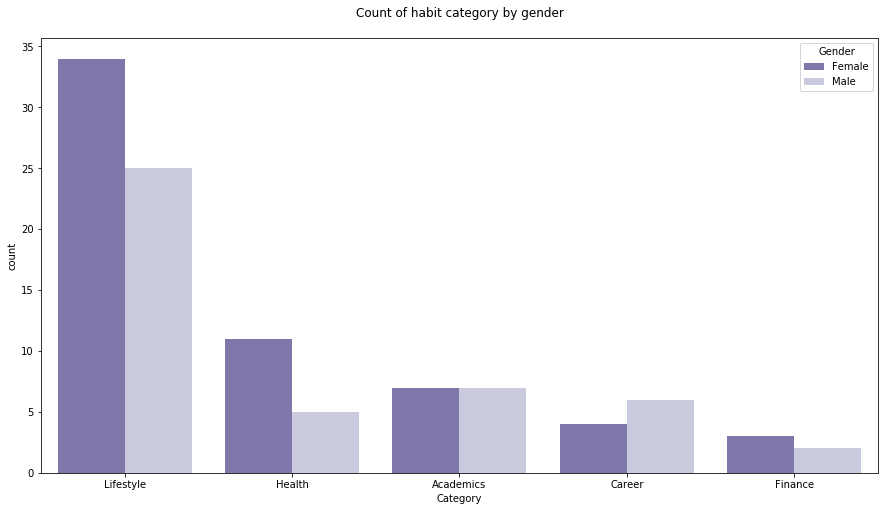

In [34]:
# bar chart to show gender distribution across different categories
plt.figure(figsize=(15, 8))

sns.countplot(x='Category', data=df, hue='Gender', palette='Purples_r')
plt.title('Count of habit category by gender\n');
#plt.savefig('Count of habit category by gender.jpg')

In [35]:
# subset age range with habit app interest

Age_App_Interest = df[['Age','habit_app_interest']]
Age_App_Interest.head()

,Age,habit_app_interest
0,25-34,Yes
1,25-34,Yes
2,25-34,Yes
3,25-34,No
4,55-64,Yes


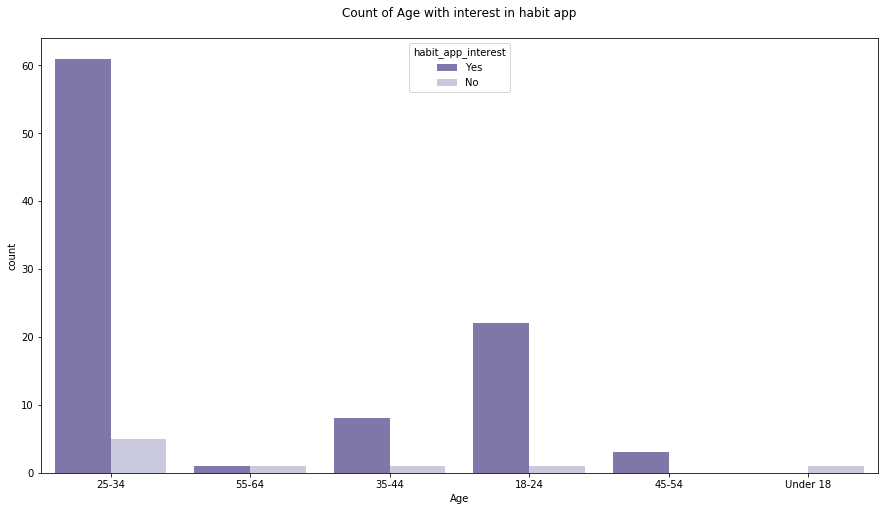

In [36]:
plt.figure(figsize=(15, 8))

sns.countplot(x='Age', data=Age_App_Interest, hue='habit_app_interest', palette='Purples_r')
plt.title('Count of Age with interest in habit app\n');
#plt.savefig('Count of Age with interest in habit app.jpg')

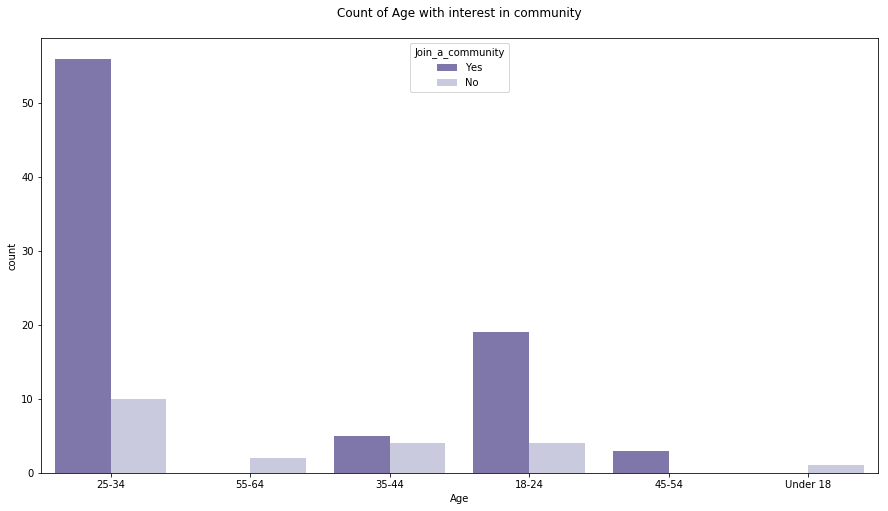

In [37]:
# bar plot showing the count of age range willing to join a community

plt.figure(figsize=(15, 8))

sns.countplot(x='Age', data=df, hue='Join_a_community', palette='Purples_r')
plt.title('Count of Age with interest in community\n');
#plt.savefig('Count of Age with interest in community.jpg')

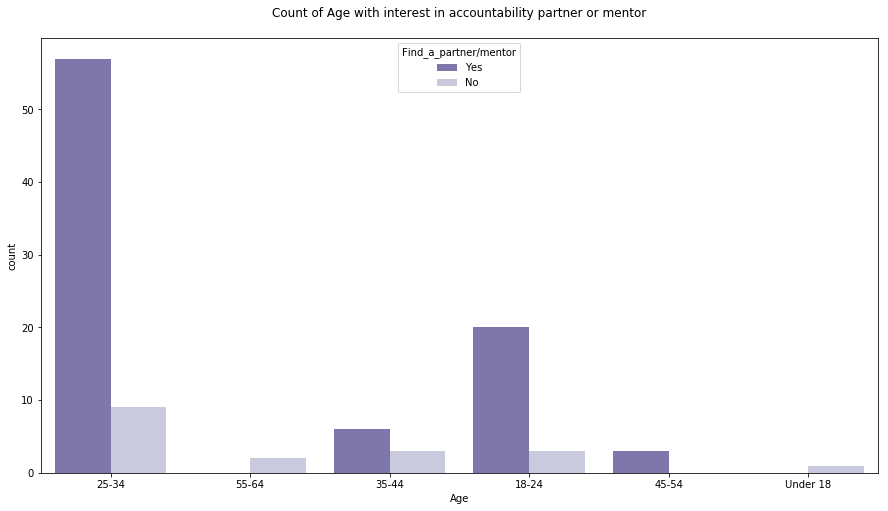

In [38]:
plt.figure(figsize=(15, 8))

sns.countplot(x='Age', data=df, hue='Find_a_partner/mentor', palette='Purples_r')
plt.title('Count of Age with interest in accountability partner or mentor\n');
#plt.savefig('Count of Age with interest in accountability partner or mentor.jpg')

<h3>From the above visual representation, the insights reflects the target audience for this product as people between the ages of 25-34. This could be related to the fact that at this age a lot of persons are in their career phase and struggle to strike a balance in their day to day activities, hence the need for a medium to help them gain stability.<h3/>

In [39]:
# remove space character from the occupation column
df['Occupation'] = df['Occupation'].str.strip(' ')

df['Occupation'].value_counts()

Student                                    19
Business                                    8
Teacher                                     5
Engineer                                    4
Data Analyst                                4
Public servant                              3
Unemployed                                  3
Civil servant                               3
Entrepreneur                                3
Accountant                                  2
Lawyer                                      2
Civil Servant                               2
Retiree                                     1
Facility Officer                            1
Mechanical engineer                         1
Fashion designer                            1
Data and material quality analyst           1
Sales representative                        1
Engineering                                 1
Chemist                                     1
Banker                                      1
Software engineer                 

In [40]:
# replace values in the Occupation column
df['Occupation'].replace({'Self-employed': 'Self employed', 'Looking for a job': 'Unemployed', 'Civil servant':'Civil Servant',
           'Civil service':'Civil Servant','Teaching':'Teacher'},inplace = True)

df['Occupation'].value_counts()

Student                                    19
Business                                    8
Civil Servant                               6
Teacher                                     6
Unemployed                                  4
Engineer                                    4
Data Analyst                                4
Entrepreneur                                3
Public servant                              3
Self employed                               2
Lawyer                                      2
Accountant                                  2
Employed                                    1
Business development manager                1
Graduate Student                            1
Facility Officer                            1
Mechanical engineer                         1
Data and material quality analyst           1
Retiree                                     1
Engineering                                 1
Software engineer                           1
Researcher                        

In [41]:
# subset to get occupation between the age range 25-34

# subset of gender within the age range of 25-34
Occupation_Age = df[df['Age'] == '25-34']['Occupation']

#set as a dataframe
Occupation_Age = pd.DataFrame(Occupation_Age, columns = ['Occupation'])

Occupation_Age.head()

,Occupation
0,Data Analyst
1,Business
2,Teacher
3,Student
5,It Specialist


In [42]:
top_occupation = Occupation_Age['Occupation'].value_counts().sort_values(ascending=False).head(10)
top_occupation

Business         7
Teacher          5
Student          5
Civil Servant    4
Engineer         4
Unemployed       3
Data Analyst     3
Self employed    2
Lawyer           2
Accountant       2
Name: Occupation, dtype: int64

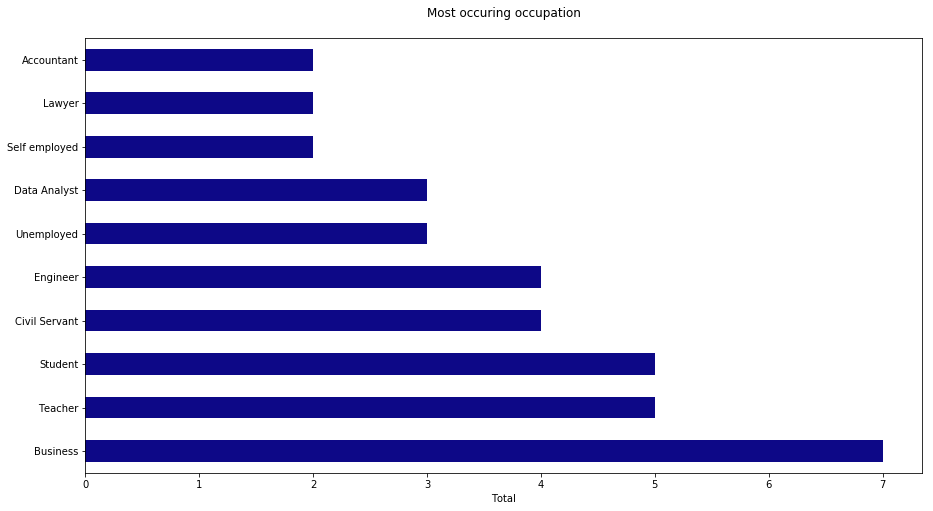

In [43]:
# bar plot to show top occupation of people between age 25-34
plt.figure(figsize=(15, 8))

top_occupation.plot(kind='barh', colormap='plasma')
plt.xlabel('Total')
plt.title('Most occuring occupation\n');
plt.savefig('Most occuring occupation.jpg')